# Welcome to Session 2
# Space Applications

## Opening FITS files and loading the image data

## Display FITS file

Have you seen the Horsehead Nebula?

In [1]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
import numpy as np
# Important
from astropy.io import fits

Let’s open the FITS file to find out what it contains.

In [2]:
# %matplotlib inline
plt.style.use(astropy_mpl_style)
hdu_list = fits.open('HorseHead.fits')

In [4]:
hdu_list.info()

Filename: HorseHead.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


Generally, the image information is located in the <code>PRIMARY</code> block. The blocks are numbered and can be accessed by indexing <code>hdu_list</code>.

In [10]:
hdu_list[0].header

SIMPLE  =                    T /FITS: Compliance                                
BITPIX  =                   16 /FITS: I*2 Data                                  
NAXIS   =                    2 /FITS: 2-D Image Data                            
NAXIS1  =                  891 /FITS: X Dimension                               
NAXIS2  =                  893 /FITS: Y Dimension                               
EXTEND  =                    T /FITS: File can contain extensions               
DATE    = '2014-01-09        '  /FITS: Creation Date                            
ORIGIN  = 'STScI/MAST'         /GSSS: STScI Digitized Sky Survey                
SURVEY  = 'SERC-ER '           /GSSS: Sky Survey                                
REGION  = 'ER768   '           /GSSS: Region Name                               
PLATEID = 'A0JP    '           /GSSS: Plate ID                                  
SCANNUM = '01      '           /GSSS: Scan Number                               
DSCNDNUM= '00      '        

.


In [11]:
image_data = hdu_list[0].data
image_data

array([[ 7201,  6642,  6642, ...,  9498,  9498, 10057],
       [ 6642,  6363,  6642, ..., 10057, 10616, 10616],
       [ 6922,  6642,  6922, ..., 10337, 11175, 10616],
       ...,
       [ 5412,  5132,  5412, ..., 13000, 12580, 12021],
       [ 5796,  5517,  5796, ..., 12546, 12546, 11987],
       [ 5796,  5796,  6076, ..., 11987, 12546, 12546]], dtype=int16)

In [36]:
image_data1 = fits.getdata('HorseHead.fits')
image_data1
print(image_data1)

[[ 7201  6642  6642 ...  9498  9498 10057]
 [ 6642  6363  6642 ... 10057 10616 10616]
 [ 6922  6642  6922 ... 10337 11175 10616]
 ...
 [ 5412  5132  5412 ... 13000 12580 12021]
 [ 5796  5517  5796 ... 12546 12546 11987]
 [ 5796  5796  6076 ... 11987 12546 12546]]


In [25]:
np.array_equal(image_data,image_data1)

True

Great! At this point, we can close the FITS file because we've stored everything we wanted to a variable.

In [26]:
hdu_list.close()

# Viewing the image data and getting basic statistics

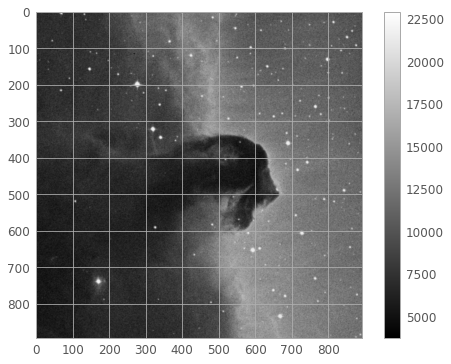

In [14]:
# %matplotlib inline
plt.imshow(image_data, cmap='gray')
plt.colorbar()

For more color maps http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps

Let's get some basic statistics about our image:

In [28]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Std deviation:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Std deviation: 3032.3927542049046


### Plotting a histogram

To make a histogram with `matplotlib.pyplot.hist()`, we'll need to cast the data from a 2D array to something one dimensional.

In this case, let's use the `ndarray.flatten()` to return a 1D numpy array.

In [29]:
image_data.flatten()

array([ 7201,  6642,  6642, ..., 11987, 12546, 12546], dtype=int16)

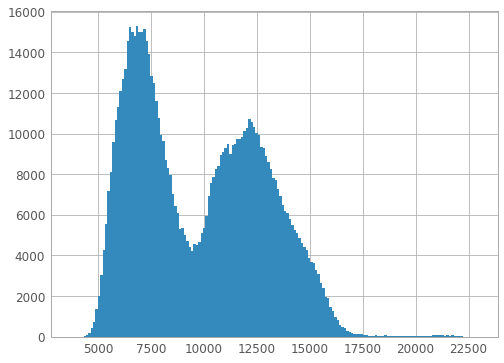

In [30]:
histogram = plt.hist(image_data.flatten(), bins='auto')

## Same thing but logarithmic!

What if we want to use a logarithmic color scale? To do so, we'll need to load the `LogNorm` object from `matplotlib`.

In [31]:
from matplotlib.colors import LogNorm

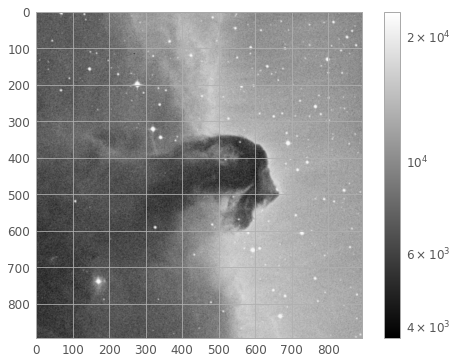

In [32]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())
plt.colorbar()

# M42 - Orion Nebula

https://dr12.sdss.org/fields

In [35]:
g=fits.open('frame-u-006073-4-0063.fits')
g[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

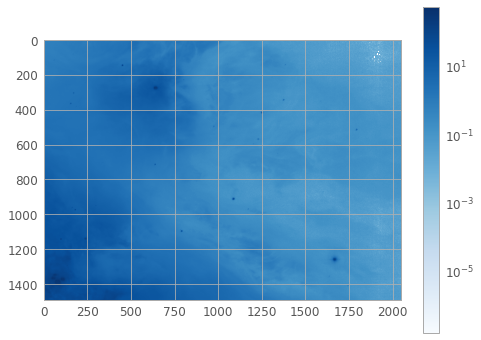

In [36]:
plt.figure()
plt.imshow(fits.getdata('frame-u-006073-4-0063.fits'),norm=LogNorm(),cmap="Blues")
cbar = plt.colorbar()

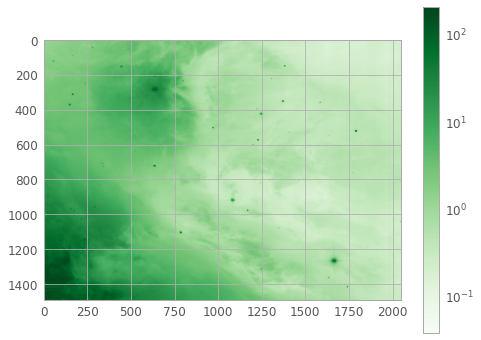

In [37]:
plt.figure()
plt.imshow(fits.getdata('frame-g-006073-4-0063.fits'),norm=LogNorm(),cmap="Greens")
cbar = plt.colorbar()

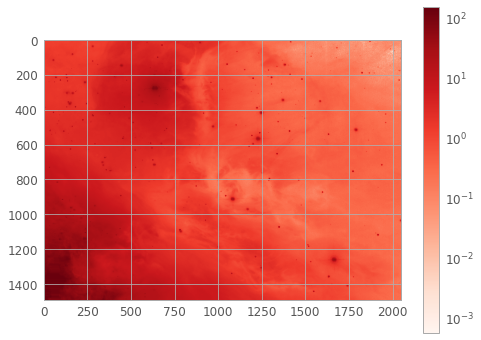

In [38]:
plt.figure()
plt.imshow(fits.getdata("frame-i-006073-4-0063.fits"),norm=LogNorm(),cmap="Reds")
cbar = plt.colorbar()

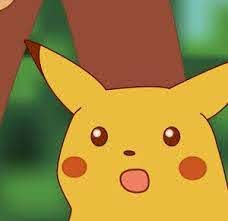

.

<center>---Restart kernel for smoother experience---</center>

## Finding the Hidden Pulsars

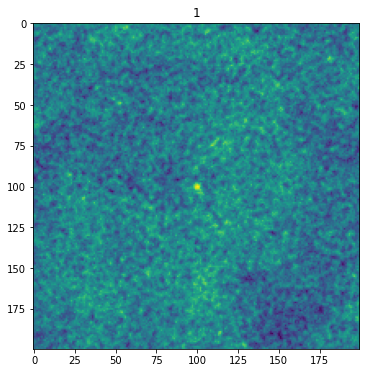

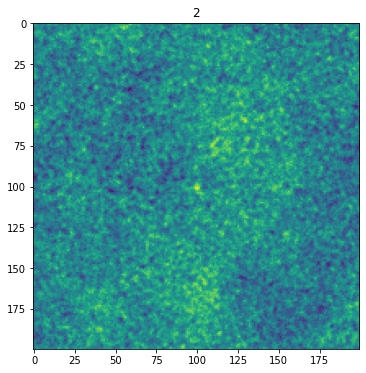

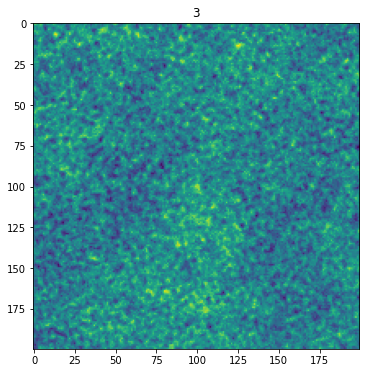

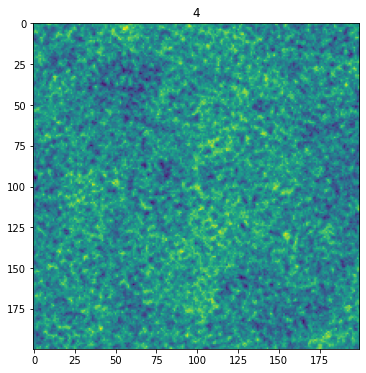

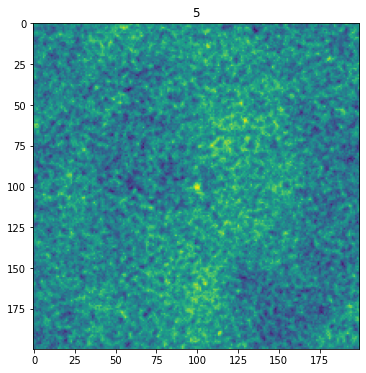

In [1]:
%matplotlib inline
import numpy as np
# from PIL import Image
from astropy.io import fits
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
data  = ['fits_images_all/image0.fits', 'fits_images_all/image1.fits', 'fits_images_all/image2.fits','fits_images_all/image3.fits','fits_images_all/image4.fits']
j=1
for i in data:
    plt.figure(figsize=(6,6))
    plt.title(j)
    j+=1
    plt.imshow(fits.getdata(i))

Stacking and taking mean

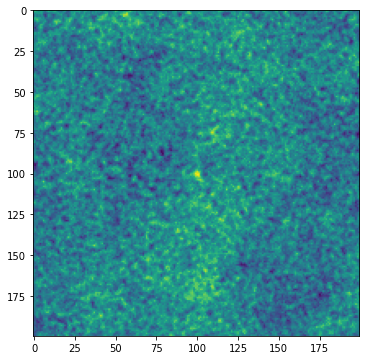

In [2]:
image_list=['fits_images_all/image0.fits', 'fits_images_all/image1.fits', 'fits_images_all/image2.fits','fits_images_all/image3.fits','fits_images_all/image4.fits']
image_concat=[]
for image in image_list:
    image_concat.append(fits.getdata(image))
# image_concat = [fits.getdata(image) for image in image_list]
stack_mean=np.mean(image_concat,axis=0)
plt.figure(figsize=(6,6))
plt.imshow(stack_mean)
# np.mean(image_concat,axis=0)

Histogram of one image data vs stacked one

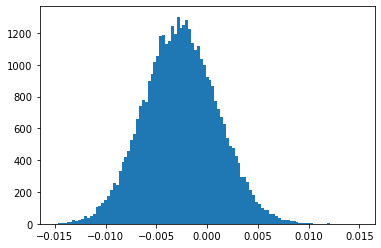

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
image_hist = plt.hist(fits.getdata(image_list[1]).flatten(), bins='auto',range=[-0.015,0.015])

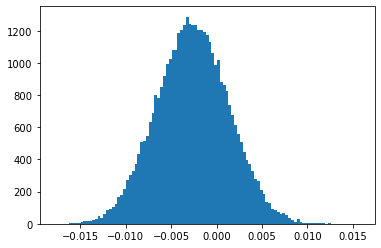

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
image_hist = plt.hist(stack_mean.flatten(), bins='auto')

## Can we do this better?

In [6]:
ar=np.array([1,2,3,4,5])
np.mean(ar)

3.0

In [7]:
np.median(ar)

3.0

In [2]:
ar=np.array([1,2,3,4,50])
np.mean(ar)

12.0

In [3]:
np.median(ar)

3.0

# Median

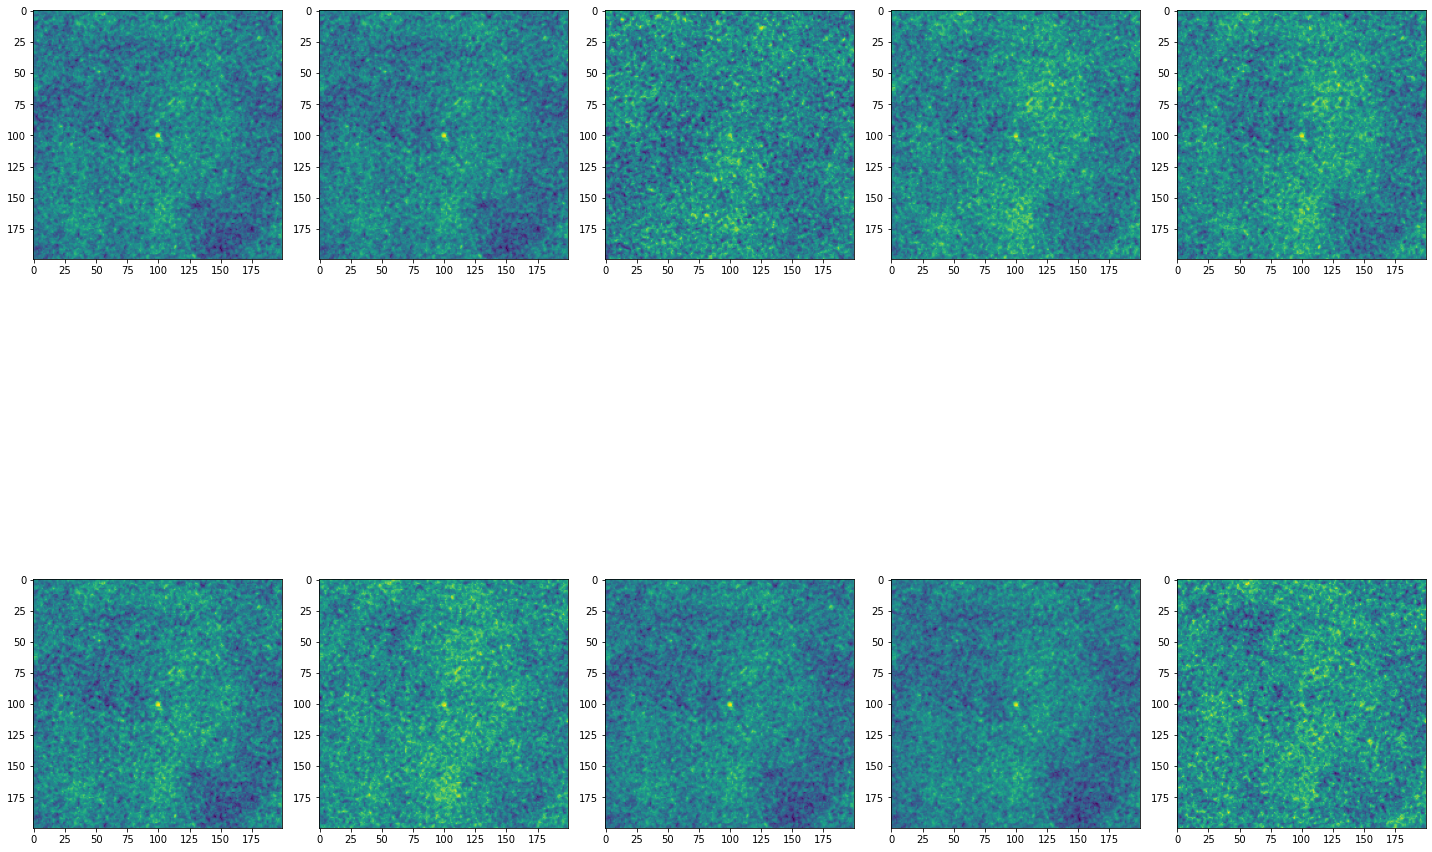

In [10]:
%matplotlib inline
image_med_data=[]
path="image{}.fits"
fig1,axis=plt.subplots(nrows=2,ncols=5,figsize=(20,20))
for i in range(10):
    p=fits.getdata(path.format(i))
    image_med_data.append(p)
    axis[i//5,i%5].imshow(p)
fig1.tight_layout(h_pad=0)

Stacking and taking median, compare that to single image

In [11]:
np.median(image_med_data,axis=0)

array([[-0.00171077, -0.00082809,  0.00241029, ..., -0.00448845,
        -0.00042421, -0.00058812],
       [ 0.0008764 , -0.00078915, -0.00097984, ..., -0.0026649 ,
        -0.0029578 ,  0.00056235],
       [-0.003719  , -0.00140372, -0.00050901, ..., -0.00142783,
        -0.00350235, -0.0003762 ],
       ...,
       [-0.00424529, -0.00516569, -0.00538156, ..., -0.00342571,
        -0.00408155,  0.00065221],
       [-0.00657394, -0.00401734, -0.0028283 , ..., -0.00483358,
        -0.00327303, -0.00248251],
       [-0.0045717 , -0.00473114, -0.00176411, ..., -0.00678473,
        -0.00686183, -0.00266288]])

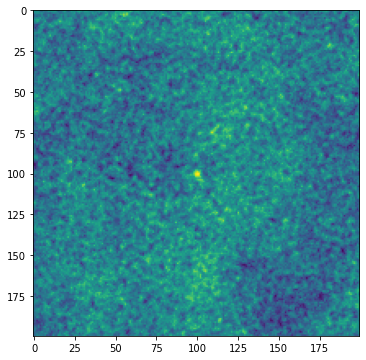

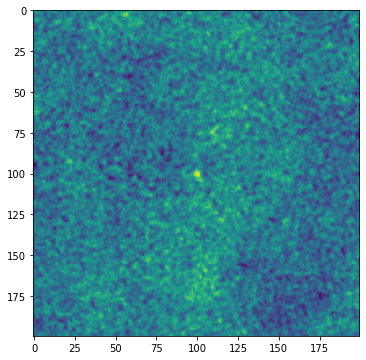

In [24]:
plt.figure(figsize=(6,6))
plt.imshow(np.median(image_med_data,axis=0))
plt.figure(figsize=(6,6))
plt.imshow(np.mean(image_med_data,axis=0))

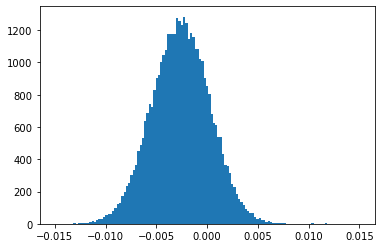

In [13]:
image_hist = plt.hist(np.median(image_med_data,axis=0).flatten(),  range=[-0.015,0.015],bins='auto')

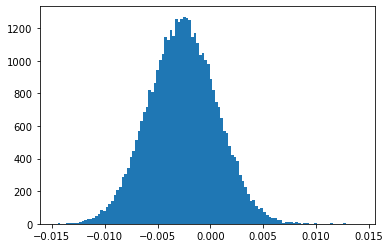

In [14]:
image_hist = plt.hist(np.mean(image_med_data,axis=0).flatten(), bins='auto')

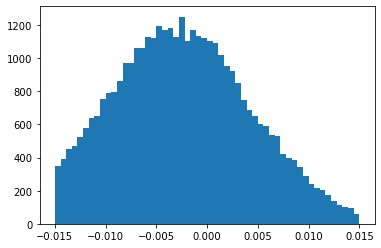

In [15]:
image_hist = plt.hist(fits.getdata('image10.fits').flatten(), bins='auto',range=[-0.015,0.015])

# Which method is better?

## 1000 FITS

In [16]:
image_concat=[]
for i in range(1000):
    a=fits.getdata('pulsar_example_fits_1000/{0:04}.fits'.format(i))
    image_concat.append(a)
stack_mean=np.mean(image_concat,axis=0)
stack_median=np.median(image_concat,axis=0)

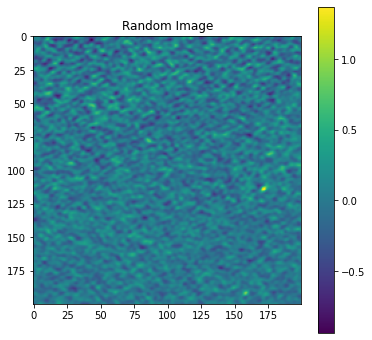

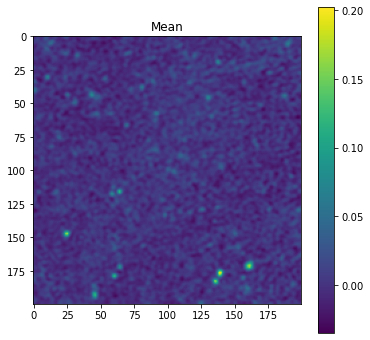

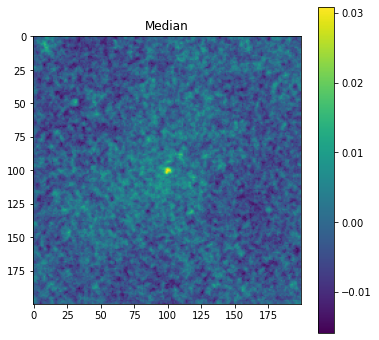

In [17]:
plt.figure(figsize=(6,6))
plt.imshow(fits.getdata('pulsar_example_fits_1000/0555.fits'))
plt.colorbar()
plt.title('Random Image')
plt.figure(figsize=(6,6))
plt.imshow(stack_mean)
plt.colorbar()
plt.title('Mean')
plt.figure(figsize=(6,6))
plt.imshow(stack_median)
plt.title('Median')
plt.colorbar()

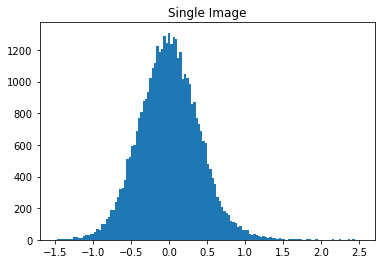

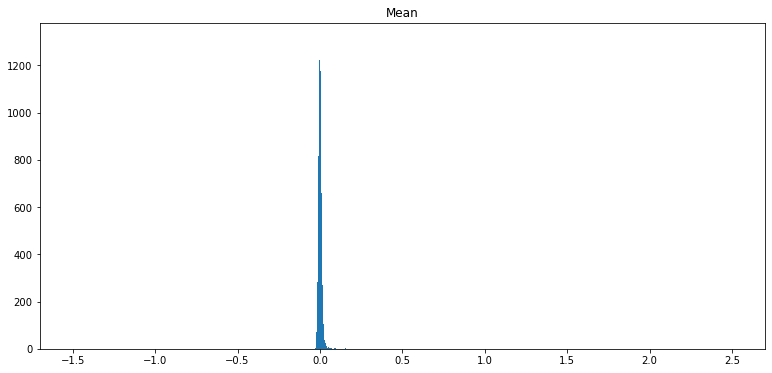

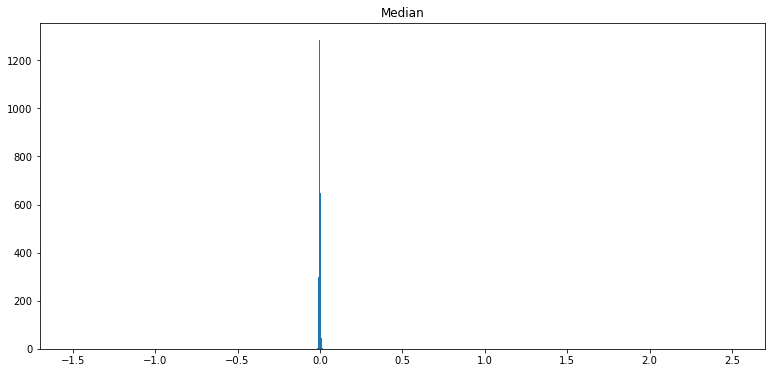

In [18]:
plt.hist(image_concat[345].flatten(),bins='auto',range=[-1.5,2.5])
plt.title('Single Image')
plt.figure(figsize=(13, 6))
plt.title('Mean')
plt.hist(stack_mean.flatten(),bins='auto',range=[-1.5,2.5]);
plt.figure(figsize=(13, 6))
plt.title('Median')
plt.hist(stack_median.flatten(),bins='auto',range=[-1.5,2.5]);

---

https://soutiknandy.github.io

You can register for the training programme on <br>
https://spaceonova.com/python